# Task 1.4P: Weather Data Analysis for NYC Airports

**Name**: Hashaam Khan  
**Student ID**: S223871946   
**Email**: s223871946@deakin.edu.au  
**Course**: SIT731 – Postgraduate  

---

## Introduction

This report involves analyzing the `nycflights13_weather.csv.gz` dataset, which contains hourly weather observations for three major NYC airports (LGA, JFK, and EWR) for the year 2013.

The objective is to clean and convert the dataset into metric units, compute daily and monthly wind speed statistics, identify extreme weather events, and visualize the results using Python and pandas.

Postgraduate-level tasks include outlier detection and monthly trend comparison across all three airports.


### Task 2.1: Convert Columns to Metric Units

The dataset provides weather measurements in imperial units. In this task, we convert the following columns to metric (SI) units:

- `temp` and `dewp`: from Fahrenheit (°F) to Celsius (°C)
- `precip`: from inches to millimetres
- `visib`: from miles to metres
- `wind_speed` and `wind_gust`: from miles per hour (mph) to metres per second (m/s)

All conversions are performed in-place, directly overwriting the original columns to simplify later analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("nycflights13_weather.csv", on_bad_lines='skip',skiprows=42)

# Confirm initial structure
print("Initial columns:", df.columns.tolist())
print(df.head(3))


# --- Unit conversions ---
# Fahrenheit to Celsius: (°F − 32) × 5/9
df["temp"] = (df["temp"] - 32) * 5 / 9
df["dewp"] = (df["dewp"] - 32) * 5 / 9

# Inches to mm: in × 25.4
df["precip"] = df["precip"] * 25.4

# Miles to metres: mi × 1609.34
df["visib"] = df["visib"] * 1609.34

# mph to m/s: mph × 0.44704
df["wind_speed"] = df["wind_speed"] * 0.44704
df["wind_gust"] = df["wind_gust"] * 0.44704

# Confirm the changes
print(df[["temp", "dewp", "precip", "visib", "wind_speed", "wind_gust"]].head())


Initial columns: ['origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'time_hour']
  origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     0  37.04  21.92  53.97     230.0    10.35702   
1    EWR  2013      1    1     1  37.04  21.92  53.97     230.0    13.80936   
2    EWR  2013      1    1     2  37.94  21.92  52.09     230.0    12.65858   

   wind_gust  precip  pressure  visib            time_hour  
0  11.918651     0.0    1013.9   10.0  2013-01-01 01:00:00  
1  15.891535     0.0    1013.0   10.0  2013-01-01 02:00:00  
2  14.567241     0.0    1012.6   10.0  2013-01-01 03:00:00  
   temp  dewp  precip    visib  wind_speed  wind_gust
0   2.8  -5.6     0.0  16093.4    4.630002   5.328114
1   2.8  -5.6     0.0  16093.4    6.173336   7.104152
2   3.3  -5.6     0.0  16093.4    5.658892   6.512139
3   3.3  -5.0     0.0  16093.4    6.173336   7.104152
4

### Task 2.2: Compute Daily Mean Wind Speeds for LGA

In this task, we focus on analyzing wind speed data from **LaGuardia Airport (LGA)**.

We filter the dataset to include only rows where the `origin` column is `"LGA"`. Then, we group the data by `year`, `month`, and `day` to compute the **daily average wind speed** across all available hours.

This results in approximately **365 values** — one for each day of the year — providing a time series of daily wind speed trends at LGA in 2013. These values will later support visualization and trend analysis.


In [2]:
# Filter dataset to include only LGA airport
lga_data = df[df["origin"] == "LGA"]

# Group by year, month, and day to calculate daily mean wind speed
daily_wind_lga = lga_data.groupby(["year", "month", "day"])["wind_speed"].mean().reset_index()

# Rename for clarity (optional)
daily_wind_lga.rename(columns={"wind_speed": "daily_avg_wind_speed"}, inplace=True)

# Display first 5 rows
print(daily_wind_lga.head())


   year  month  day  daily_avg_wind_speed
0  2013      1    1              6.687781
1  2013      1    2              6.430559
2  2013      1    3              4.908660
3  2013      1    4              6.880698
4  2013      1    5              5.144447


### Task 2.3: Visualization of Daily Mean Wind Speeds at LGA

In this task, we present the previously calculated **daily average wind speeds** at LaGuardia Airport (LGA) as a line plot using `matplotlib`.

The x-axis is formatted with **human-readable dates** to make it easy to interpret trends throughout the year. The y-axis shows the daily average wind speed in **metres per second (m/s)**.

This plot helps us visually explore how wind speed fluctuates across different seasons and identify potential periods of high or low wind activity at LGA.


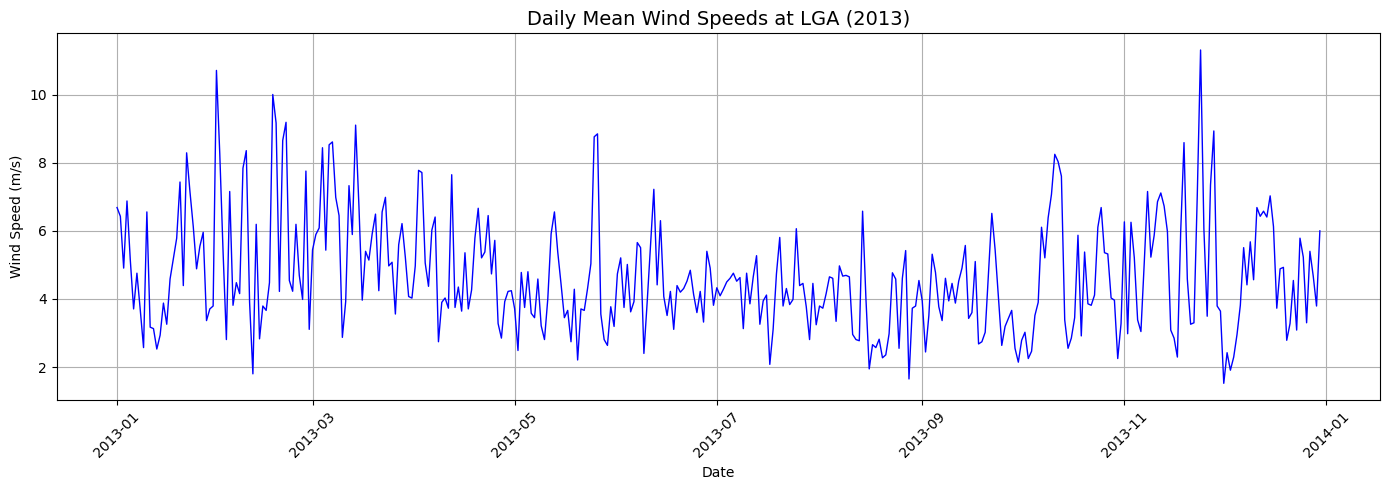

In [3]:
# Combine year, month, day into a datetime column for plotting
daily_wind_lga["date"] = pd.to_datetime(daily_wind_lga[["year", "month", "day"]])

# Sort by date (just in case)
daily_wind_lga.sort_values("date", inplace=True)

# Plot
plt.figure(figsize=(14, 5))
plt.plot(daily_wind_lga["date"], daily_wind_lga["daily_avg_wind_speed"], color="blue", linewidth=1)

# Titles and labels
plt.title("Daily Mean Wind Speeds at LGA (2013)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Improve x-axis readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 2.4: Identify the Ten Windiest Days at LGA

In this task, we identify the ten days in 2013 that recorded the **highest average daily wind speeds** at **LaGuardia Airport (LGA)**.

This is done by:
1. Using the daily mean wind speed data calculated earlier.
2. Sorting the values in descending order.
3. Selecting the top 10 rows with the highest wind speeds.

The result shows the exact dates and their corresponding wind speed values. This information helps us detect extreme wind events throughout the year.


In [4]:
# Recreate the date column if not already added
daily_wind_lga["date"] = pd.to_datetime(daily_wind_lga[["year", "month", "day"]])


# Sort by wind speed descending and get top 10
windiest_days = daily_wind_lga.sort_values(by="daily_avg_wind_speed", ascending=False).head(10).round(2)

# Format output: just date and wind speed
windiest_days_formatted = windiest_days[["date", "daily_avg_wind_speed"]]
print(windiest_days_formatted.to_string(index=False))


      date  daily_avg_wind_speed
2013-11-24                 11.32
2013-01-31                 10.72
2013-02-17                 10.01
2013-02-21                  9.19
2013-02-18                  9.17
2013-03-14                  9.11
2013-11-28                  8.94
2013-05-26                  8.85
2013-05-25                  8.77
2013-02-20                  8.66


### Task 3.1: Monthly Mean Wind Speeds Across All Airports (Postgraduate)

In this postgraduate extension, we compute the **monthly average wind speeds** for all three NYC airports: **LGA**, **JFK**, and **EWR**.

Before computing these means, we address **data quality** by detecting and handling one **clear outlier** in the wind speed measurements. This extreme value is likely due to a recording error, as it is far outside the expected physical range for wind speeds.

To maintain data integrity, we:
- Programmatically locate the maximum wind speed value in the dataset.
- Replace it with `NaN` using `np.nan` to exclude it from further calculations.
- Group the cleaned data by `origin`, `year`, and `month` to compute the monthly mean wind speeds for each airport.

This task ensures that the monthly trends are based on reliable and realistic wind speed data.


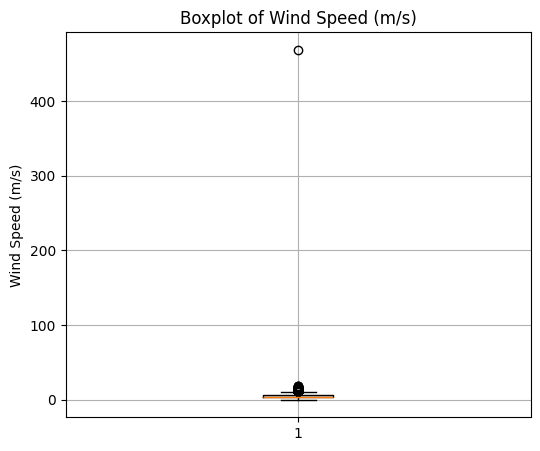

In [5]:
import matplotlib.pyplot as plt

# Plot boxplot for wind_speed
plt.figure(figsize=(6, 5))
plt.boxplot(df["wind_speed"].dropna(), vert=True)
plt.title("Boxplot of Wind Speed (m/s)")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()


A boxplot of wind speeds revealed one extreme outlier well above the typical range — visually shown as a single distant point. This indicates a data entry error or an unrealistic measurement.

In [8]:

# Step 1: Identify the max wind speed (potential outlier)
max_wind = df["wind_speed"].max()
print(f"Max wind speed before cleaning: {max_wind:.2f} m/s")

# Step 2: Replace the outlier with NaN
df["wind_speed"] = df["wind_speed"].replace(max_wind, np.nan)

# Step 3: Group by origin, year, and month to get monthly mean wind speeds
monthly_means = df.groupby(["origin", "year", "month"])["wind_speed"].mean().reset_index()

# Optional: round the means for cleaner display
monthly_means["wind_speed"] = monthly_means["wind_speed"].round(2)

# Preview result
print(monthly_means.head())

Max wind speed before cleaning: 468.66 m/s
  origin  year  month  wind_speed
0    EWR  2013      1        4.33
1    EWR  2013      2        4.73
2    EWR  2013      3        5.14
3    EWR  2013      4        4.27
4    EWR  2013      5        3.71


### Task 3.1 (continued): Monthly Mean Wind Speed Trends by Airport

To compare wind patterns across the three major NYC airports (**LGA**, **JFK**, and **EWR**), we plotted the **monthly average wind speeds** for each airport on a single line chart.

Each curve is displayed in a different color, and a legend clearly identifies the corresponding airport.

This visualization highlights seasonal wind patterns and allows us to:
- Observe fluctuations in wind speed throughout the year
- Compare windiness across the three airports
- Identify periods of higher or lower wind speeds

The x-axis represents the months of 2013, and the y-axis shows wind speeds in **metres per second (m/s)**.


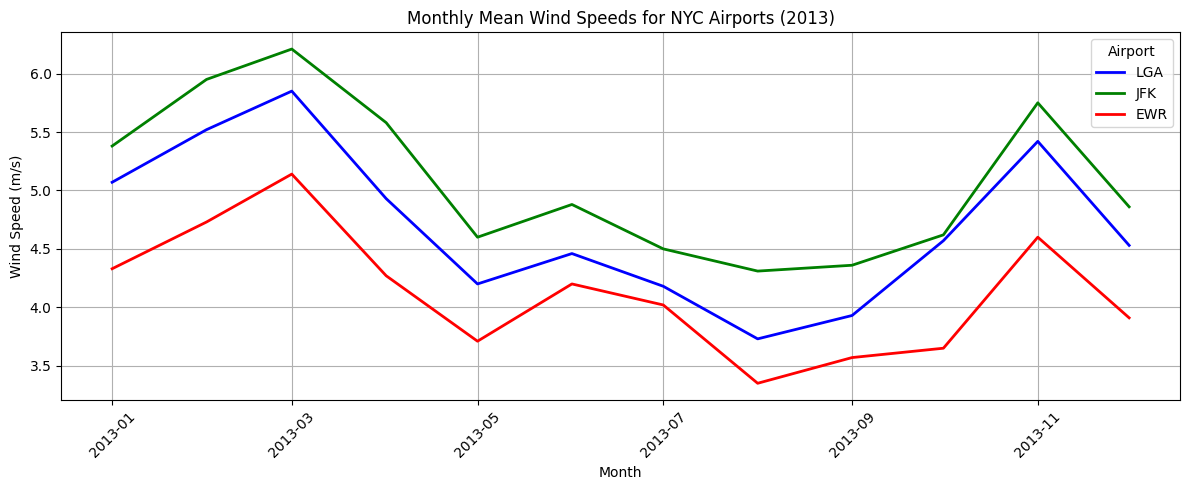

In [11]:
import matplotlib.pyplot as plt

# Reuse 'monthly_means' from earlier (already grouped by origin, year, month)
# Create a datetime column for the x-axis
monthly_means["date"] = pd.to_datetime({
    "year": monthly_means["year"],
    "month": monthly_means["month"],
    "day": 1  # use first of each month
})

# Plot setup
plt.figure(figsize=(12, 5))

# Plot each airport separately
for airport, color in zip(["LGA", "JFK", "EWR"], ["blue", "green", "red"]):
    subset = monthly_means[monthly_means["origin"] == airport]
    plt.plot(subset["date"], subset["wind_speed"], label=airport, color=color, linewidth=2)

# Labels and legend
plt.title("Monthly Mean Wind Speeds for NYC Airports (2013)")
plt.xlabel("Month")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.legend(title="Airport")
plt.grid(True)
plt.tight_layout()
plt.show()
